### Exploratory Data Analysis
#### Bambee Garfield
#### Northwest Missouri State University
#### Data Analytics Capstone Project

##### Import cleaned data file

In [37]:
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns
import os
from tabulate import tabulate

# Read in cleaned file
df_kept = pd.read_csv('cleaned_data.csv')

# Remove unneeded columns
df_kept = df_kept.iloc[:, 1:11]  # Keep columns 2 to 10
df_kept.to_csv('updated_data.csv', index=False)
print(df_kept.head())

# Create folder for outputs
output_folder = 'EDA-Graphs'
os.makedirs(output_folder, exist_ok=True)

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  
0         0.2419  
1         0.1812  
2         0.2069  
3         0.2597  
4         0.1809  


#### Central Tendancies and Unique Counts

In [38]:
df_kept_no_diagnosis = df_kept.drop(columns=['diagnosis'])

# Calculate central tendencies
mean_values = df_kept_no_diagnosis.mean().round(3)
median_values = df_kept_no_diagnosis.median().round(3)
mode_values = df_kept_no_diagnosis.mode().iloc[0].round(3)  # mode() returns a DataFrame, so use iloc[0] to get the first row (mode values)

# Create a DataFrame for central tendencies
central_tendencies = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values
})

# Format the DataFrame for display
central_tendencies.index.name = 'Feature'
central_tendencies.reset_index(inplace=True)

# Define the directory and CSV file path
csv_dir = 'eda-tables'
csv_file = 'central_tendencies.csv'

# Create the directory if it doesn't exist
os.makedirs(csv_dir, exist_ok=True)

# Save DataFrame to CSV file
csv_path = os.path.join(csv_dir, csv_file)
central_tendencies.to_csv(csv_path, index=False)

# Display as a pretty table
table = tabulate(central_tendencies, headers='keys', tablefmt='fancy_grid')

print("Central Tendencies:")
print(table)
print(f"\nCentral tendencies saved as CSV file to '{csv_path}'")

# Calculate unique counts
unique_counts = df_kept['diagnosis'].value_counts()

# Define the file path where you want to save the unique counts CSV file
csv_unique_counts = 'eda-graphs/unique_counts.csv'

# Save unique counts Series to CSV file
unique_counts.to_csv(csv_unique_counts)

print(f"Unique counts saved as CSV file to '{csv_unique_counts}'")


Central Tendencies:
╒════╤═════════════════════╤═════════╤══════════╤═════════╕
│    │ Feature             │    Mean │   Median │    Mode │
╞════╪═════════════════════╪═════════╪══════════╪═════════╡
│  0 │ radius_mean         │  14.127 │   13.37  │  12.34  │
├────┼─────────────────────┼─────────┼──────────┼─────────┤
│  1 │ texture_mean        │  19.29  │   18.84  │  14.93  │
├────┼─────────────────────┼─────────┼──────────┼─────────┤
│  2 │ perimeter_mean      │  91.969 │   86.24  │  82.61  │
├────┼─────────────────────┼─────────┼──────────┼─────────┤
│  3 │ area_mean           │ 654.889 │  551.1   │ 512.2   │
├────┼─────────────────────┼─────────┼──────────┼─────────┤
│  4 │ smoothness_mean     │   0.096 │    0.096 │   0.101 │
├────┼─────────────────────┼─────────┼──────────┼─────────┤
│  5 │ compactness_mean    │   0.104 │    0.093 │   0.115 │
├────┼─────────────────────┼─────────┼──────────┼─────────┤
│  6 │ concavity_mean      │   0.089 │    0.062 │   0     │
├────┼──────────────

#### Diagnosis Pie Chart

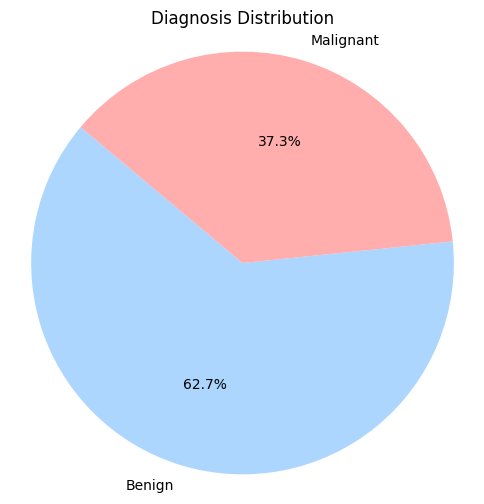


Pie chart saved as 'eda-graphs\diagnosis_pie_chart.png'


In [46]:
# Create pie chart for diagnosis distribution
plt.figure(figsize=(6, 6))
labels = ['Benign', 'Malignant']
sizes = unique_counts.values

# Define colors with alpha for opacity
colors = [(0.6, 0.8, 1, 0.8), (1, 0.6, 0.6, 0.8)]

#explode = (0, 0.1)  

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Diagnosis Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Define the directory and filename for saving the pie chart
output_folder = 'eda-graphs'
os.makedirs(output_folder, exist_ok=True)
pie_chart_path = os.path.join(output_folder, 'diagnosis_pie_chart.png')

# Save the pie chart as an image file
plt.savefig(pie_chart_path)
plt.show()

# Optionally, print the path where the pie chart is saved
print(f"\nPie chart saved as '{pie_chart_path}'")

#### Histograms

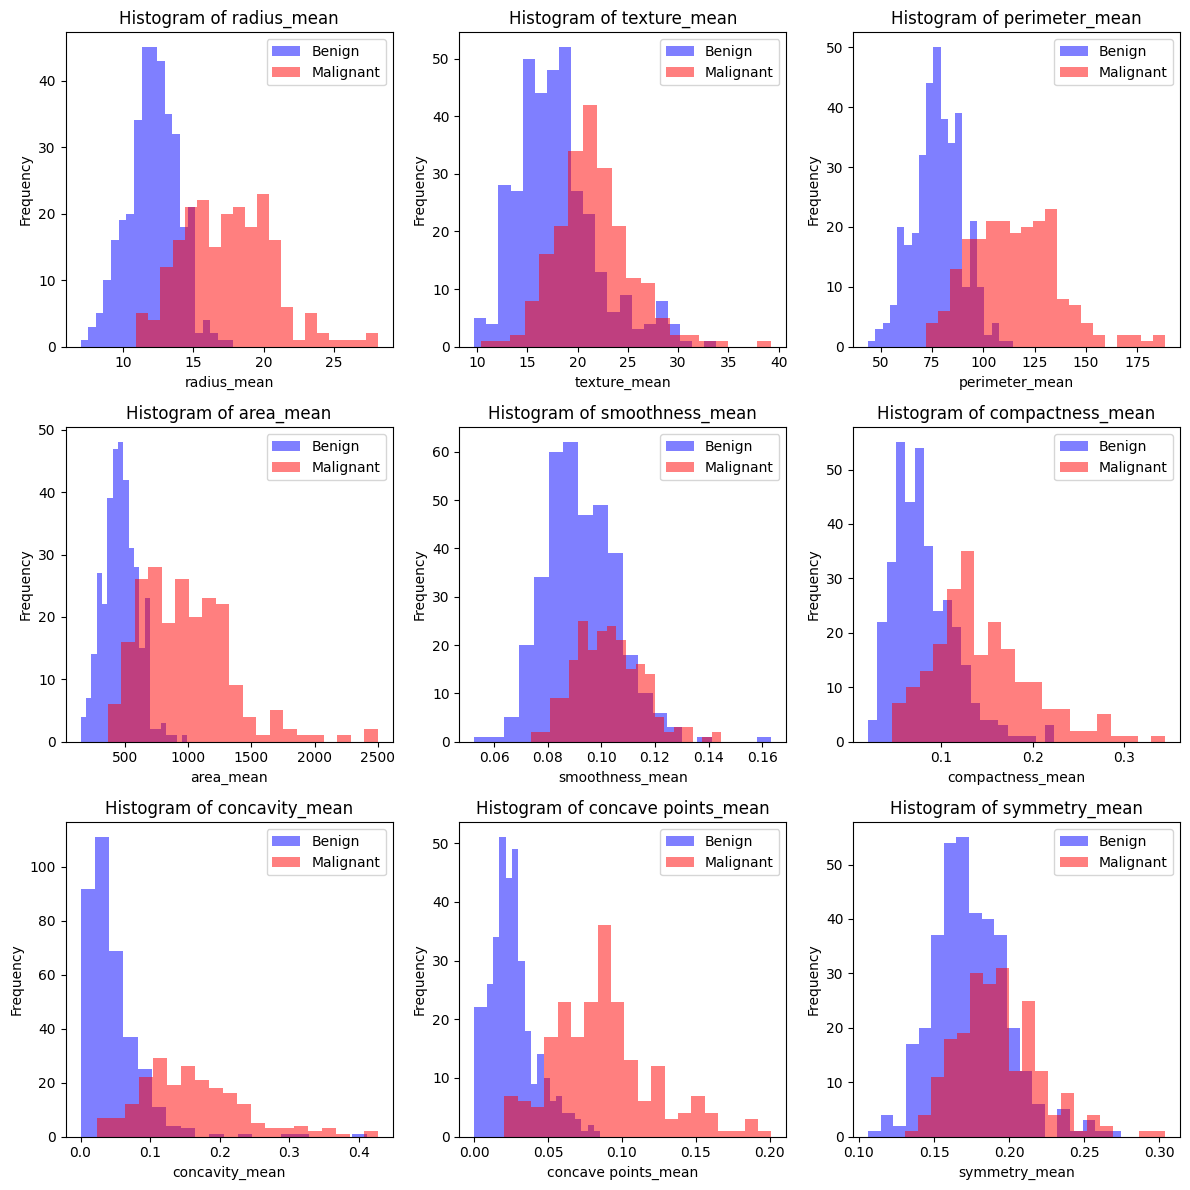

In [40]:
features = df_benign_no_diagnosis.columns
num_features = len(features)

# Determine the number of rows and columns needed based on the number of features
num_rows = (num_features + 2) // 3  # Ensure enough rows to accommodate all features
num_cols = min(num_features, 3)  # Always have 3 columns or fewer

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, num_rows * 4))

for i, feature in enumerate(features):
    row, col = divmod(i, num_cols)
    axes[row, col].hist(df_benign_no_diagnosis[feature], bins=20, alpha=0.5, label='Benign', color='blue')
    axes[row, col].hist(df_malignant_no_diagnosis[feature], bins=20, alpha=0.5, label='Malignant', color='red')
    axes[row, col].set_title(f'Histogram of {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].legend(loc='upper right')

# Remove any empty subplot if num_features does not perfectly fit into rows and columns
if num_features < num_rows * num_cols:
    for j in range(num_features, num_rows * num_cols):
        fig.delaxes(axes.flatten()[j])

plt.tight_layout()
output_folder = 'EDA-Graphs'
plt.savefig(os.path.join(output_folder, 'histograms.png'))
plt.show()


#### Correlation Heatmap

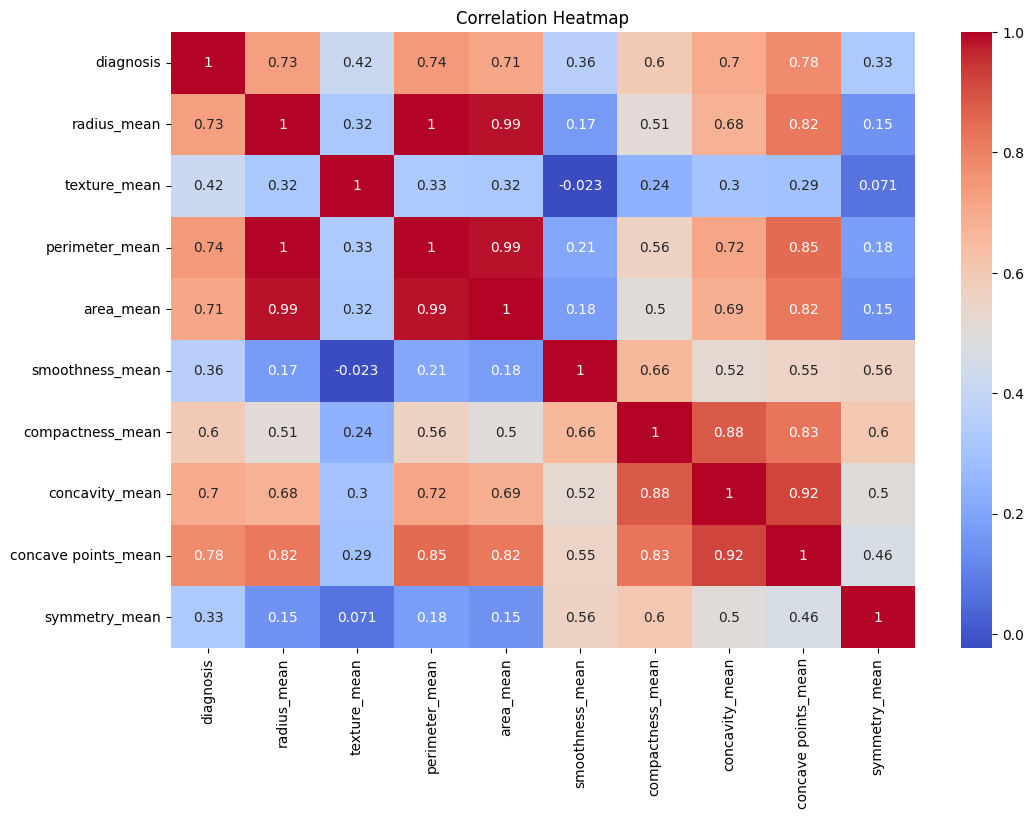

In [41]:
    # Heatmap of correlation matrix
    plt.figure(figsize=(12, 8))
    correlation = df_kept.corr()
    sns.heatmap(correlation, annot=True, cmap='coolwarm', xticklabels=correlation.columns, yticklabels=correlation.columns)
    plt.title('Correlation Heatmap')
    plt.savefig(os.path.join(output_folder, 'correlation_heatmap.png'))
    plt.show()

#### Box Plots

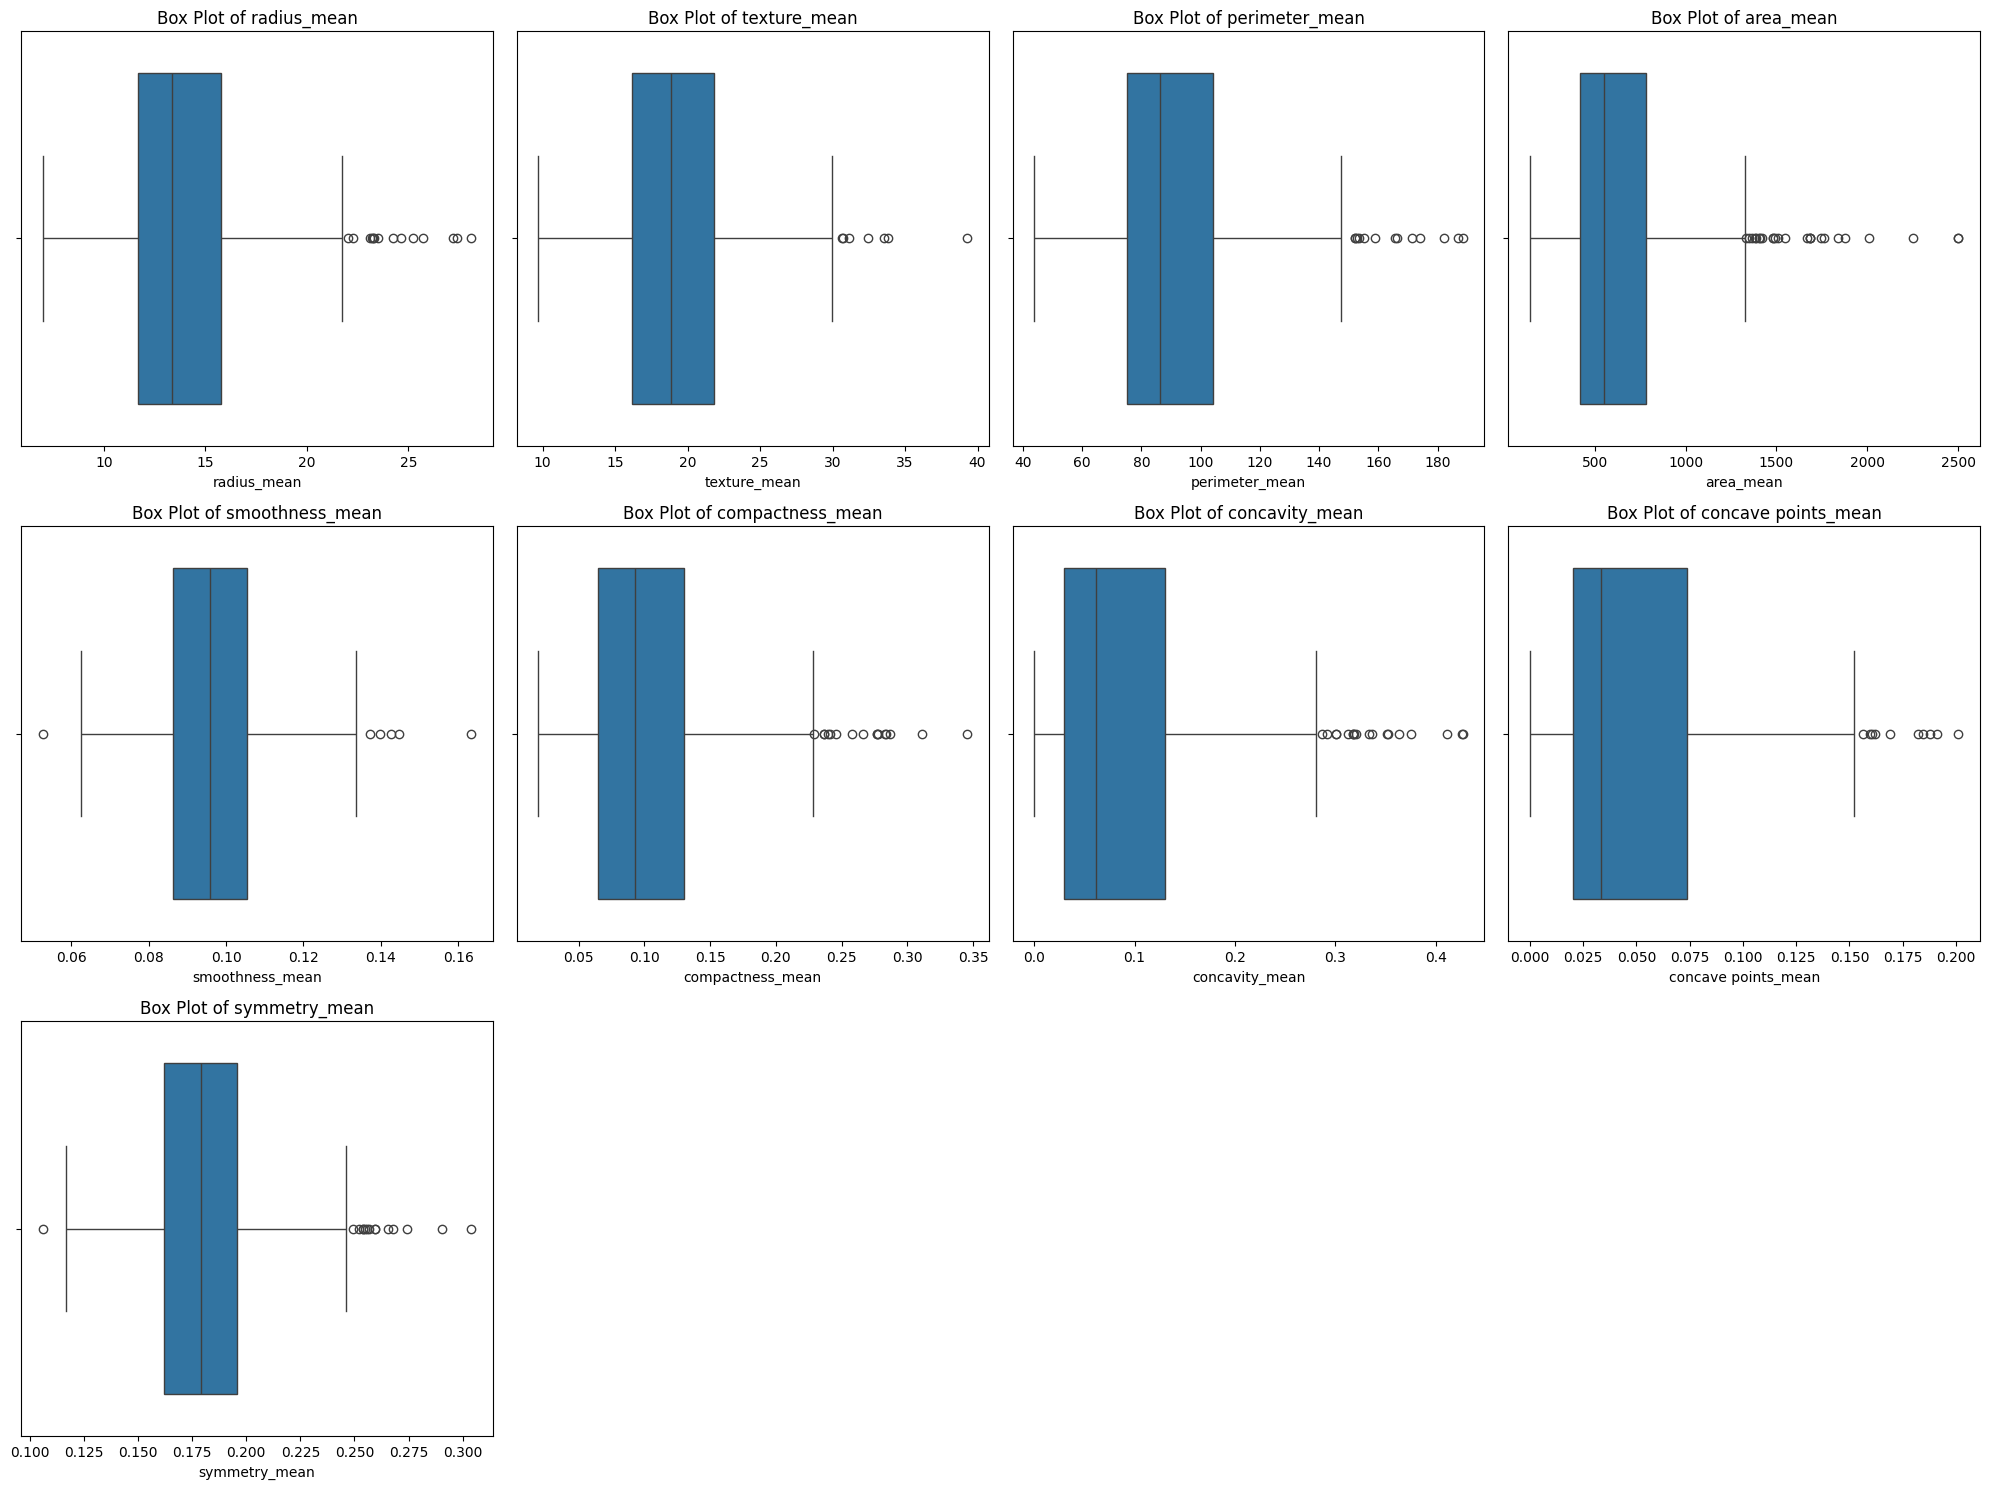

In [42]:
# Box plots for each feature
plt.figure(figsize=(20, 15))
num_columns = df_kept.columns[df_kept.dtypes != 'object'].drop('diagnosis')  # Exclude 'diagnosis'

for i, column in enumerate(num_columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df_kept[column])
    plt.title(f'Box Plot of {column}')
    
plt.tight_layout()
plt.savefig(os.path.join(output_folder, 'box_plots.png'))
plt.show()